In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd

import eda
import clf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
df_tr = pd.read_csv('df_CCF_tr.csv')
df_val = pd.read_csv('df_CCF_val.csv')
df_ts = pd.read_csv('df_CCF_ts.csv')

tr_val = [df_tr, df_val]

df_tr.shape, df_val.shape, df_ts.shape

((170884, 31), (56961, 31), (56962, 31))

In [ ]:
df_tr.head()

,y,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.499137,-0.430143,0.463459,0.800149,-1.934880,0.211584,-0.664218,0.719895,-0.243919,...,-0.026048,-0.017874,-0.063432,-0.771515,-0.642216,1.235345,-0.109194,-0.579533,0.116668,-0.304076
1,0,-1.129859,-0.676619,1.444300,0.092089,0.179392,0.519775,-0.836650,1.565604,-1.063878,...,2.086904,-0.503779,0.822047,-0.127625,0.630838,-0.690146,-1.077520,1.364258,-1.015729,-0.348475
2,0,0.445841,-0.531977,0.490154,-0.163589,-2.076608,1.001201,0.720844,0.394383,0.769478,...,-0.392167,-0.225548,-0.782509,-0.063856,-1.595238,-0.451956,0.950474,0.328040,0.231855,-0.348037
3,0,1.467942,0.046686,0.473790,-0.456997,0.982677,0.928748,-0.504587,0.602919,-0.152598,...,0.381638,0.048901,0.276893,-0.136364,0.868156,-1.046533,1.477764,0.425566,0.688609,-0.294838
4,0,0.686680,-2.576537,0.563624,-0.990432,-0.514083,0.256007,-0.049376,1.147069,-2.347490,...,-2.181025,1.164445,-1.273901,-0.069455,0.914240,0.364851,-0.786481,-7.420303,4.927590,0.094678


### TRAINING:

In [ ]:
param_dict = dict(
          penalty = ['l2'],
                C = [10**i for i in range(-15, 15, 2)],
           solver = ['lbfgs'],
     class_weight = ['balanced'],
         max_iter = [600]
    )

In [ ]:
from sklearn.linear_model import LogisticRegression

model_class = LogisticRegression
df_Xy = df_tr

trained_models = clf.fn_train_models(df_Xy, model_class, param_dict)
len(trained_models)

100% |########################################################################|


15

### MODEL PERFORMANCES CURVES:

'successful'

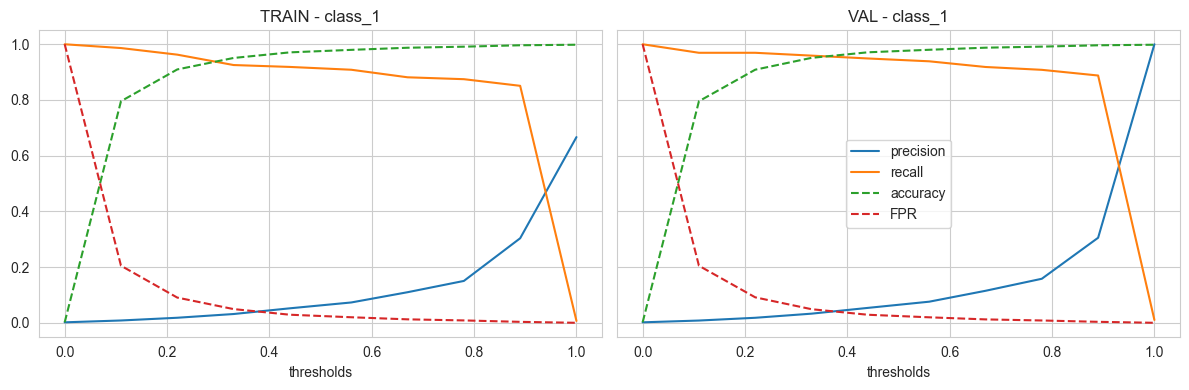

In [ ]:
model_n = 6
trained_model = trained_models[model_n]

tr_val = tr_val

clf.fn_model_curves(trained_model, tr_val)

'successful'

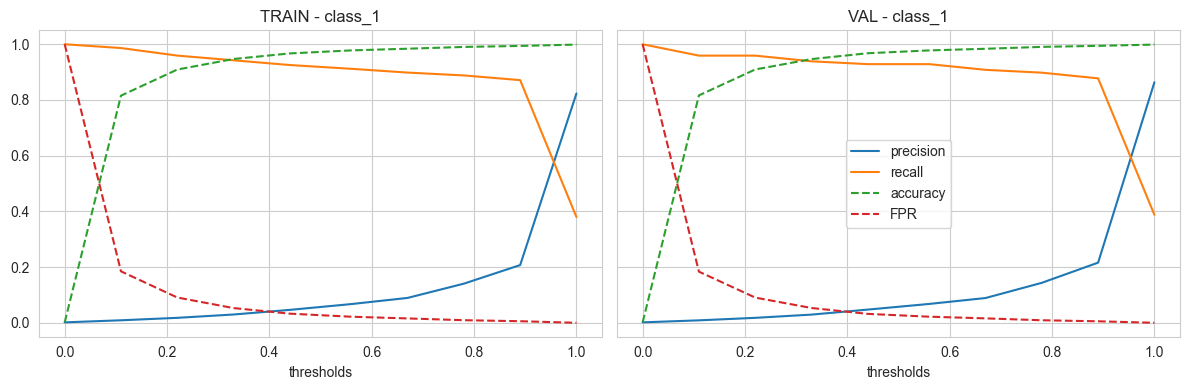

In [ ]:
model_n = 10
trained_model = trained_models[model_n]

clf.fn_model_curves(trained_model, tr_val)

### TESTING THE MODEL:

**(WE CHOOSE MODEL 10 AND USE A PREDICTION THRESHOLD OF 0.2)

In [ ]:
df_Xy = df_tr

trained_model = trained_models[10]
threshold = 0.2

y_pred_tr = clf.fn_test_model_binary_clf(df_Xy, trained_model,
                                         threshold_class_1 = threshold)

-------------------------------------
LOGLOSS : 0.1179
ACCURACY: 0.899
-------------------------------------
          prec    rec  f1_score
class_0  99.99  89.89    94.671
class_1   1.63  96.61     3.206


In [ ]:
df_Xy = df_ts

y_pred_ts = clf.fn_test_model_binary_clf(df_Xy, trained_model,
                                         threshold_class_1 = threshold)

-------------------------------------
LOGLOSS : 0.1138
ACCURACY: 0.9
-------------------------------------
          prec    rec  f1_score
class_0  99.99  90.01    94.738
class_1   1.59  92.93     3.127


### SAVING THE MODEL:

In [ ]:
from joblib import dump, load
dump(trained_models[10], 'model_big_logreg.joblib')

### ISOLATING THE DATA THAT WAS PREDICTED AS POSITIVE BY THE ABOVE MODEL:

In [ ]:
y_pred_tr_1_idxs = y_pred_tr[y_pred_tr.values == 1].index

df_smaller = df_tr.iloc[y_pred_tr_1_idxs]
df_smaller.shape

(17536, 31)

### SAVING THE SMALLER DATASET:

In [ ]:
df_smaller.to_csv('df_smaller_logreg.csv', index = False)

### CHECKING CLASS DISTRIBUTION IN SMALLER DATASET:

In [ ]:
df_smaller = pd.read_csv('df_smaller_logreg.csv')
df_smaller.shape

(17536, 31)

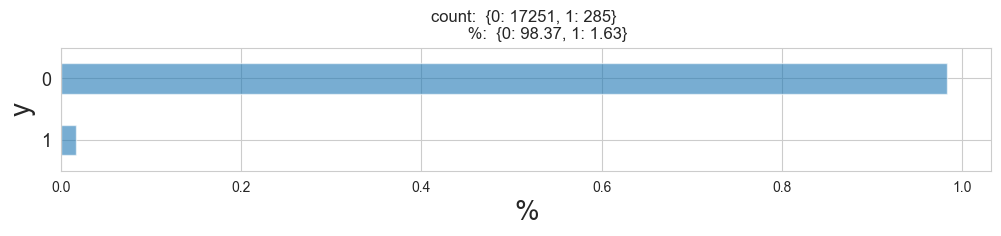

In [ ]:
df_data = df_smaller
feat = 'y'

eda.fn_plot_bar(df_data, feat)